In [1]:
from PIL import Image
from itertools import product
import random as Random
from random import random
from random import gauss
import cv2
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

In [2]:
class Noise:
    def __init__(self, input_image):
        self.input_image = input_image
        self.input_pix = self.input_image.load()
        self.w, self.h = self.input_image.size

    def saltpepper(self, salt=0.05, pepper=0.05):
        output_image = Image.new("L", self.input_image.size)
        output_pix = output_image.load()

        for x, y in product(*map(range, (self.w, self.h))):
            r = random()
            if r < salt:
#                 output_pix[x, y] = (255, 255, 255)
                output_pix[x, y] = 255
            elif r > 1 - pepper:
#                 output_pix[x, y] = (  0,   0,   0)
                output_pix[x, y] = 0
            else:
                output_pix[x, y] = self.input_pix[x, y]
        return output_image
    
    def gaussian(self, amp=50):
        output_image = Image.new("L", self.input_image.size)
        output_pix = output_image.load()
        for x, y in product(*map(xrange, (self.w, self.h))):
#             noised_colors = map(lambda x: gauss(x, amp), self.input_pix[x, y])
#             noised_colors = map(lambda x: max(0, x), map(lambda x: min(255, x), noised_colors))
            noised = gauss(self.input_pix[x, y], amp)
            noised = max(0, min(255, noised))
            noised = int(noised)
            output_pix[x, y] = noised
        return output_image

In [3]:
# read image
cv_image = cv2.imread('/home/wutong/Dataset/CASIA/DatasetB/GEI/nm/GEI_001-nm-01-090.png', cv2.CV_8UC1)
# opencv -> PIL
image = Image.fromarray(cv_image)

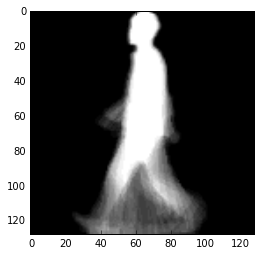

In [4]:
plt.imshow(image, cmap=cm.gray)

# 画像全体にごま塩ノイズ

In [5]:
noise = Noise(image)

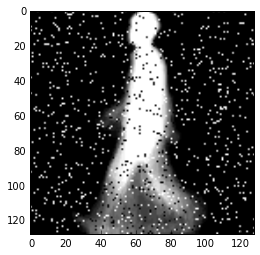

In [6]:
output_image = noise.saltpepper()
plt.imshow(output_image, cmap=cm.gray)

# 画像全体にガウシアンノイズ

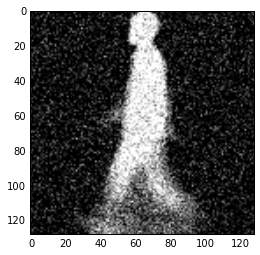

In [7]:
output_image = noise.gaussian()
plt.imshow(output_image, cmap=cm.gray)

# 輪郭に沿ってガウシアンノイズ
## 輪郭線を抽出する

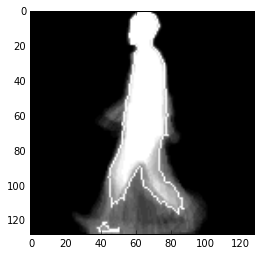

In [8]:
cv_image = cv2.imread('/home/wutong/Dataset/CASIA/DatasetB/GEI/nm/GEI_001-nm-01-090.png', cv2.CV_8UC1)
ret, thresh = cv2.threshold(cv_image, 127, 255, cv2.THRESH_BINARY)

contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(cv_image, contours, -1, 255, 1)
plt.imshow(cv_image,cmap=cm.gray)

## 輪郭線にそってノイズを乗せる

In [10]:
image_list = []
size_list = [128,96,64,32,16]
for i1 in range(1,5):    
    for i2 in range(1,7):
        image_name = "/home/wutong/Dataset/CASIA/DatasetB/GEI/nm/GEI_%03d-nm-%02d-090.png"% (i1,i2)
        image_list.append(image_name)
for i1 in range(6,125):
    for i2 in range(1,7):
        image_name = "/home/wutong/Dataset/CASIA/DatasetB/GEI/nm/GEI_%03d-nm-%02d-090.png"% (i1,i2)
        image_list.append(image_name)
        
for j1 in image_list: 
    cv_image = cv2.imread(j1, cv2.CV_8UC1)
    str = j1.split("_")       
    str = str[1].split("-")
    per = str[0]
    sequence = str[2]
    #extract contours pixels 
    ret, thresh = cv2.threshold(cv_image, 127, 255, cv2.THRESH_BINARY)
    contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

    #combine the contours to one list
    contour = []
    for item in range(len(contours)):       
        for i ,j in enumerate(contours[item]):
            contour.append(j)

    #fig, ax = plt.subplots(ncols=1, nrows=40, figsize=(40,40))
    for i, scale_val in enumerate(range(0,25)): 
        for j in range(10):
            #for i,position in enumerate(contour):
            for position in contour:
                x,y = position[0]

                scale_x = scale_y = 2
            #     print "{} [{},{}] [{},{}]".format(i, x, y, int(gauss(x, scale)), int(gauss(y, scale)))

                x = int(gauss(x, scale_x))
                y = int(gauss(y, scale_y))
                if (x in range(0,128)) & (y in range(0,128)): 
                   
                    noised = gauss(cv_image[y,x], scale_val)
                    noised = max(0, min(255, noised))
                    noised = int(noised)
                    cv_image[y,x] = noised
        for j2 in size_list:
           
            cv_image1 = cv2.resize(cv_image,(j2,j2))
        #cv2.drawContours(cv_image, contour, -1, val, 0)
            
            plt.imsave("/home/wutong/Desktop/gei_noise_0211/%s_%s_%03d_%02d.png"%(per,sequence,j2,scale_val),cv_image1,cmap=cm.gray)

